In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    return task_durations, task_priorities, robot_efficiencies


In [5]:

# GA algorithm
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    population_size = 50
    n_generations = 100
    population = [np.random.randint(0, len(robot_efficiencies), size=len(task_durations)) for _ in range(population_size)]

    best_fitness = -np.inf
    best_solution = None

    for _ in range(n_generations):
        # Evaluate fitness for each individual in the population
        fitness_values = [calculate_fitness(individual, task_durations, task_priorities, robot_efficiencies) for individual in population]

        # Select the best individual (solution) based on fitness
        idx_best_individual = np.argmax(fitness_values)
        if fitness_values[idx_best_individual] > best_fitness:
            best_fitness = fitness_values[idx_best_individual]
            best_solution = population[idx_best_individual]

        # Perform selection, crossover, and mutation here (to be implemented)
        # For now, just continue with the current population

    return best_solution if best_solution is not None else population[0]  # Return the best solution found or a random solution

    """
    Placeholder for GA implementation.

    Students should implement their GA logic here, including initialization,
    evaluation (fitness function), selection, crossover, and mutation.

    The function should return the best solution found by the GA, which is
    an array indicating the robot assigned to each task.
    """
    # Placeholder for the initial population generation
    # Placeholder for the fitness function calculation
    # Placeholder for the selection process
    # Placeholder for the crossover operation
    # Placeholder for the mutation operation
# Selection operation (Tournament Selection)
def tournament_selection(population, fitness_values, tournament_size):
    selected_parents = []
    for _ in range(2):  # Select 2 parents
        tournament = np.random.choice(len(population), tournament_size, replace=False)
        winner_index = max(tournament, key=lambda i: fitness_values[i])
        selected_parents.append(population[winner_index])
    return selected_parents

# Crossover operation (Single-Point Crossover)
def single_point_crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Mutation operation (Task Swapping)
def task_swapping_mutation(individual):
    mutated_individual = individual.copy()
    idx1, idx2 = np.random.choice(len(individual), 2, replace=False)
    mutated_individual[idx1], mutated_individual[idx2] = mutated_individual[idx2], mutated_individual[idx1]
    return mutated_individual

# Modified fitness function
def calculate_fitness(solution, task_durations, task_priorities, robot_efficiencies):
    robot_times = []
    for robot_id in np.unique(solution):
        tasks_for_robot = np.where(solution == robot_id)[0]
        time_for_robot = np.sum(task_durations[tasks_for_robot] / robot_efficiencies[robot_id])
        robot_times.append(time_for_robot)

    T_total = np.max(robot_times)
    B = np.std(robot_times)
    weighted_total_time = np.sum([task_durations[i] * task_priorities[i] for i in range(len(task_durations))])
    F = 1 / (T_total + B + weighted_total_time)  # Modified fitness function

    return F


In [6]:

# Improved visualization function
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    # Define a custom colormap that goes from light to dark
        cmap = mcolors.LinearSegmentedColormap.from_list("", [(1, 1, 1), (1, 0, 0)])  # Light red to dark red

    # Display the grid with task durations
    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            ax.text(j, i, f'P{task_priorities[j]}\n{task_durations[j]}h', ha='center', va='center', color='black')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # Create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    # Add summary statistics section below the plot
    summary_text = f"Summary Statistics:\n\n"
    summary_text += f"Total Production Time: {np.max(np.sum(grid / robot_efficiencies[:, np.newaxis], axis=1)):.2f} hours\n" # formula to calculate total p-time
    summary_text += f"Minimum Task Duration: {np.min(task_durations)} hours\n"
    summary_text += f"Maximum Task Duration: {np.max(task_durations)} hours\n"
    summary_text += f"Average Task Duration: {np.mean(task_durations):.2f} hours\n"
    summary_text += f"Minimum Robot Efficiency: {np.min(robot_efficiencies):.2f}\n"
    summary_text += f"Maximum Robot Efficiency: {np.max(robot_efficiencies):.2f}\n"
    summary_text += f"Average Robot Efficiency: {np.mean(robot_efficiencies):.2f}\n"

    plt.figtext(0.5, -0.2, summary_text, ha='center', fontsize=10, wrap=True)

    plt.tight_layout()
    plt.show()


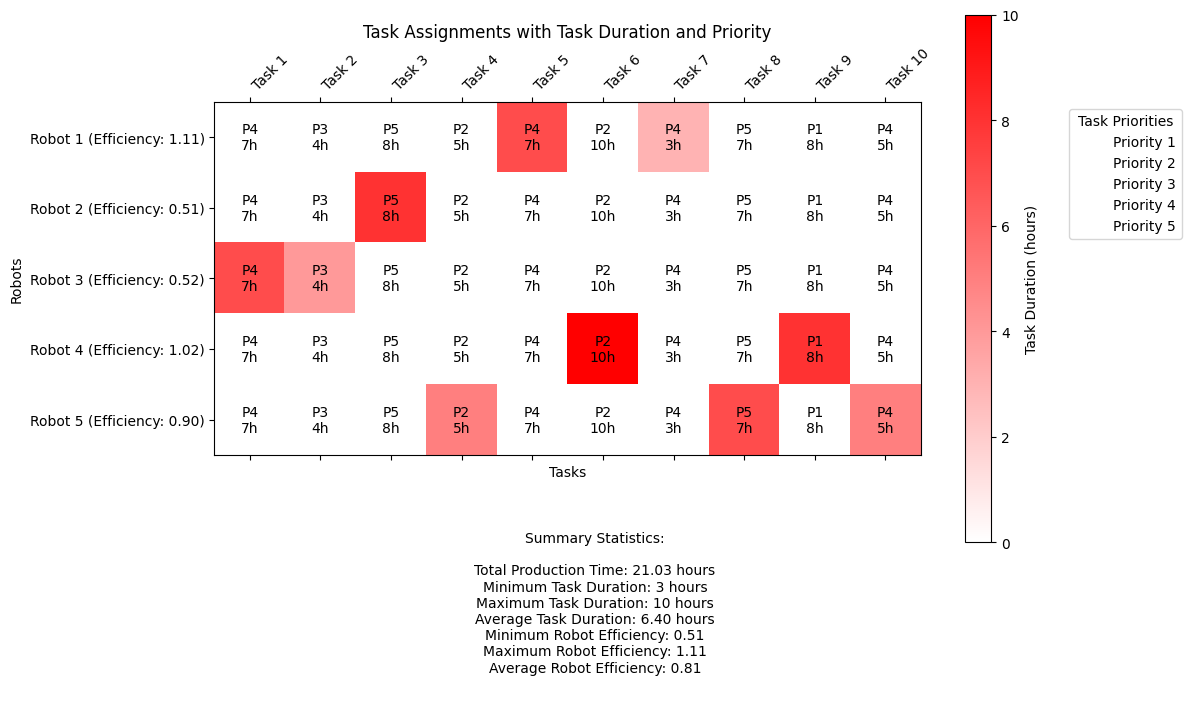

In [7]:
# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
